# Drug Classification with Machine Learning

Proje [**linki**](https://www.kaggle.com/datasets/prathamtripathi/drug-classification)

In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-classification/drug200.csv


In [63]:
df = pd.read_csv("/kaggle/input/drug-classification/drug200.csv")

In [64]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [66]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

Age


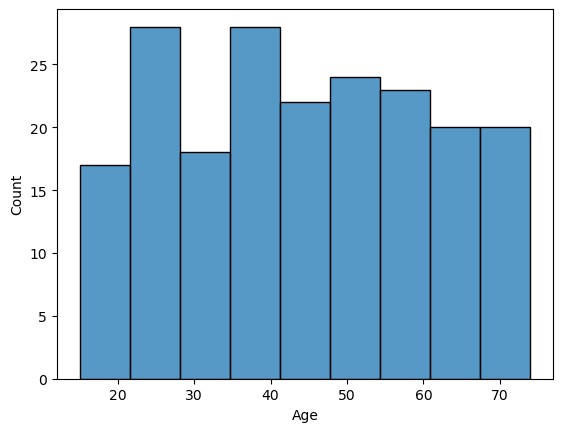

47    8
23    7
28    7
49    7
39    6
32    6
50    5
37    5
58    5
60    5
22    5
34    4
72    4
51    4
42    4
26    4
24    4
74    4
67    4
68    4
61    4
56    4
20    4
36    4
45    4
41    4
31    4
43    4
65    4
57    4
53    3
40    3
70    3
59    3
16    3
38    3
15    3
69    3
35    3
18    3
64    3
52    2
55    2
62    2
19    2
29    2
66    2
73    2
46    2
48    2
54    1
17    1
33    1
63    1
30    1
21    1
25    1
Name: Age, dtype: int64
-----------------------------------
Sex


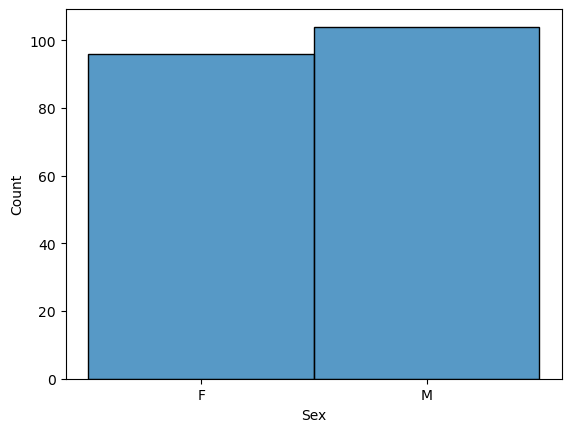

M    104
F     96
Name: Sex, dtype: int64
-----------------------------------
BP


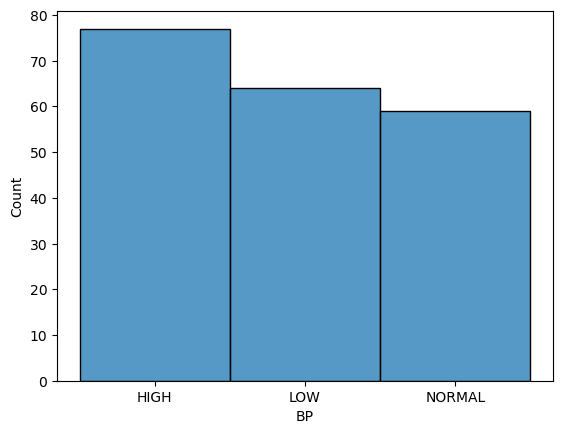

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64
-----------------------------------
Cholesterol


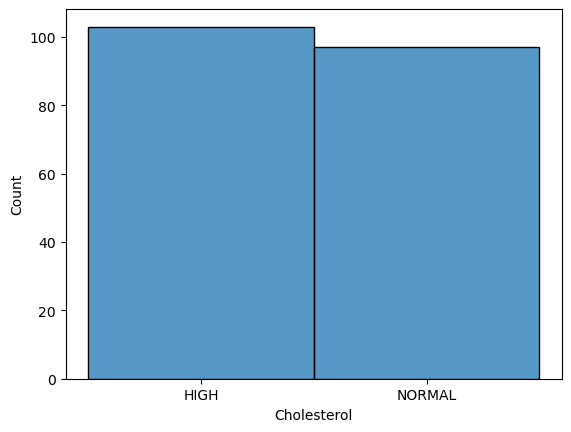

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64
-----------------------------------
Na_to_K


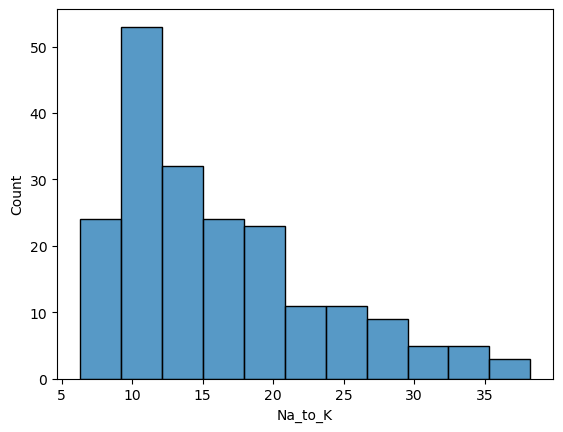

12.006    2
18.295    2
25.355    1
11.939    1
16.347    1
         ..
24.658    1
24.276    1
13.967    1
19.675    1
11.349    1
Name: Na_to_K, Length: 198, dtype: int64
-----------------------------------
Drug


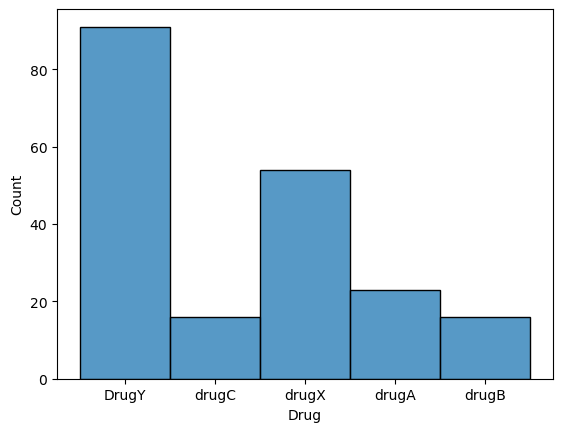

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64
-----------------------------------


In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in range(len(df.columns)):
    print(df.columns[i])
    aziz = df[df.columns[i]].value_counts()
    sns.histplot(df[df.columns[i]])
    plt.show()
    print(aziz)
    print("-"*35)

<AxesSubplot:xlabel='Age', ylabel='Count'>

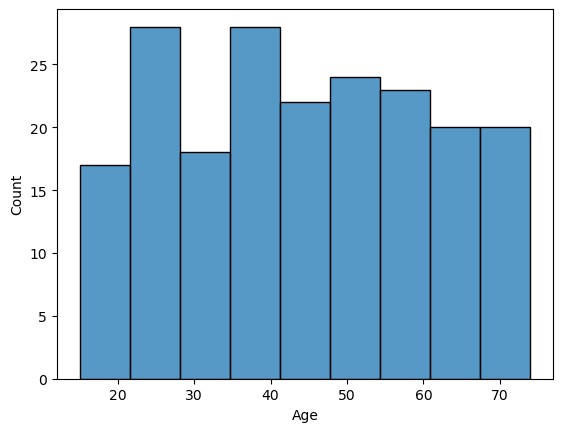

In [68]:
sns.histplot(df[df.columns[0]])

> Verilerde herhangi outlier gözlemlenmedi.

In [69]:
d = {"DrugY":"Drug-Y", "drugX":"Drug-X", "drugA":"Drug-A", "drugC":"Drug-C", "drugB":"Drug-B"}
df["Drug"] = df["Drug"].map(d)

<AxesSubplot:>

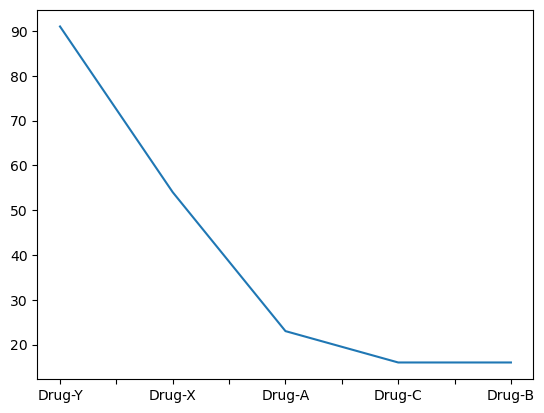

In [70]:
df["Drug"].value_counts().plot()

## Derin Öğrenme ile Sınıflandırma

#### Gerekli kütüphaneler

In [71]:
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
x = df.drop("Drug", axis=1)
y = df["Drug"]
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [73]:
x = pd.get_dummies(drop_first=True, data=df)

In [74]:
x

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Drug_Drug-B,Drug_Drug-C,Drug_Drug-X,Drug_Drug-Y
0,23,25.355,0,0,0,0,0,0,0,1
1,47,13.093,1,1,0,0,0,1,0,0
2,47,10.114,1,1,0,0,0,1,0,0
3,28,7.798,0,0,1,0,0,0,1,0
4,61,18.043,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
195,56,11.567,0,1,0,0,0,1,0,0
196,16,12.006,1,1,0,0,0,1,0,0
197,52,9.894,1,0,1,0,0,0,1,0
198,23,14.020,1,0,1,1,0,0,1,0


In [75]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.80, random_state=42)

In [76]:
def classification_test(x,y):
    
    g = GaussianNB()
    b = BernoulliNB()
    k = KNeighborsClassifier()
    l = LogisticRegression()
    d = DecisionTreeClassifier()
    r = RandomForestClassifier()
    gb = GradientBoostingClassifier()
    
    
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state=42)
    
    aziz_models = [g, b, k, l, d, r, gb]
    aziz_names = ["Gaussian Naive Bayes", "Bernoulli Naive Bayes", "K-Nearest Neighbors(KNN)", "Logistic Regression",
                 "Decision Tree", "Random Forest", "Gradient Boost"]
    
    accuracy = []
    precision = []
    recall = []
    f_score = []
    
    
    result = pd.DataFrame(columns = ["Accuracy", "Precision", "Recall", "F_Score"], index = aziz_names)
    
    for aziz in aziz_models:
        aziz.fit(x_train, y_train)
        az = aziz.predict(x_test)
        
        TP = confusion_matrix(az, y_test)[1][1]
        FN = confusion_matrix(az, y_test)[1][0]
        FP = confusion_matrix(az, y_test)[0][1]
        
        accuracy.append(accuracy_score(az, y_test))
        P = TP/(TP+FP)
        R = TP/(TP+FN)
        F1 = 2*P*R/(P+R)
        
        precision.append(P)
        recall.append(R)
        f_score.append(F1)
    
    
    result.Accuracy = accuracy
    result.Precision = precision
    result.Recall = recall
    result.F_Score = f_score
    
    return result.sort_values("Accuracy", ascending = False)

In [77]:
classification_test(x,y)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,Accuracy,Precision,Recall,F_Score
Gaussian Naive Bayes,1.0,1.0,1.0,1.0
Bernoulli Naive Bayes,1.0,1.0,1.0,1.0
Logistic Regression,1.0,1.0,1.0,1.0
Decision Tree,1.0,1.0,1.0,1.0
Random Forest,1.0,1.0,1.0,1.0
Gradient Boost,1.0,1.0,1.0,1.0
K-Nearest Neighbors(KNN),0.7,1.0,1.0,1.0
